# EDA Exploratory Data Analysis
##### Referência: https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e

#### Configuração do Notebook

#### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
# import seaborn as sns#Understanding my variables

#### Configurando o Notebook

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;)}{/sytyle}"))

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 2000)

#### Habilitando o Auto complete

In [3]:
%config IPCompleter.greedy=True

#### Carregando meu dataset CSV

In [4]:
df = pd.read_csv(r'C:\Users\hik_m\Documents\Jornada do Conhecimento\Projetos\EDA-Exploratory_Data_Analysis\datasets\craigslistVehicles.csv')

#### Análise inicial do meu dataset carregado

In [5]:
# Informações gerais do meu dataframe/dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677812 entries, 0 to 677811
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   url           677812 non-null  object 
 1   city          677812 non-null  object 
 2   price         677812 non-null  int64  
 3   year          677514 non-null  float64
 4   manufacturer  624214 non-null  object 
 5   make          650319 non-null  object 
 6   condition     397822 non-null  object 
 7   cylinders     401581 non-null  object 
 8   fuel          670034 non-null  object 
 9   odometer      453250 non-null  float64
 10  title_status  673279 non-null  object 
 11  transmission  670682 non-null  object 
 12  VIN           240365 non-null  object 
 13  drive         415113 non-null  object 
 14  size          231502 non-null  object 
 15  type          398859 non-null  object 
 16  paint_color   402534 non-null  object 
 17  image_url     677754 non-null  object 
 18  lat 

In [6]:
# Lendo as 5 primeiras linhas
df.head(5)

,url,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,lat,long
0,https://tricities.craigslist.org/cto/d/1978-br...,tricities,5000,1978.0,ford,bronco,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00r0r_eGnnFC1JNm...,37.132840,-95.785580
1,https://tricities.craigslist.org/cto/d/2008-bu...,tricities,5000,2008.0,buick,lucerne cxl v6,like new,6 cylinders,gas,51000.0,clean,automatic,NaN,fwd,full-size,sedan,grey,https://images.craigslist.org/00N0N_1LSHqLESW9...,35.777999,-83.612533
2,https://tricities.craigslist.org/cto/d/2006-po...,tricities,13500,2006.0,NaN,Pont GTO,excellent,8 cylinders,gas,93000.0,clean,automatic,NaN,rwd,mid-size,coupe,red,https://images.craigslist.org/00Y0Y_4cbEgS4prY...,36.333900,-82.340800
3,https://tricities.craigslist.org/cto/d/2006-me...,tricities,6200,2006.0,mercedes-benz,NaN,NaN,NaN,gas,NaN,rebuilt,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00T0T_fGLx4Ltazq...,36.000092,-84.018302
4,https://tricities.craigslist.org/cto/d/2016-fo...,tricities,37900,2016.0,ford,f350,excellent,8 cylinders,diesel,70500.0,clean,automatic,NaN,4wd,NaN,truck,white,https://images.craigslist.org/00k0k_ls78o6lwVq...,36.272932,-82.537537


In [7]:
# Lendo as últimas 5 linhas
df.tail(5)

,url,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,lat,long
677807,https://anchorage.craigslist.org/cto/d/wheelch...,anchorage,14050,2007.0,dodge,caravan (braun ramp),excellent,NaN,gas,NaN,clean,automatic,1D4GP24R17B104268,fwd,mid-size,mini-van,green,https://images.craigslist.org/00808_dfbZV1NFDR...,61.288605,-148.894406
677808,https://anchorage.craigslist.org/ctd/d/2005-gm...,anchorage,3299,2005.0,gmc,g1500,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00T0T_17pY2zVlTa...,61.592300,-149.395900
677809,https://anchorage.craigslist.org/cto/d/2016-ki...,anchorage,9500,2016.0,kia,rio lx,like new,4 cylinders,gas,3180.0,clean,automatic,KNADM4A30G6686,fwd,mid-size,sedan,blue,https://images.craigslist.org/00o0o_b6eud791hL...,61.190000,-149.893800
677810,https://anchorage.craigslist.org/cto/d/2014-fo...,anchorage,8499,2014.0,ford,mustang,fair,6 cylinders,gas,NaN,clean,manual,NaN,rwd,full-size,coupe,black,https://images.craigslist.org/00505_j4uY8mSD5W...,61.630300,-148.987200
677811,https://anchorage.craigslist.org/cto/d/subaru-...,anchorage,3900,2001.0,subaru,forester,good,4 cylinders,gas,115000.0,rebuilt,manual,NaN,4wd,mid-size,NaN,silver,https://images.craigslist.org/00Y0Y_cBGIWLYbMc...,61.546300,-149.590100


In [8]:
# Apresentando a quantidade total de linhas e colunas
df.shape

(677812, 20)

In [9]:
# Visualizando as colunas do meu dataset
df.columns

Index(['url', 'city', 'price', 'year', 'manufacturer', 'make', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'image_url', 'lat', 'long'],
      dtype='object')

In [10]:
# Apresentando os datatype de cada coluna
df.dtypes

url              object
city             object
price             int64
year            float64
manufacturer     object
make             object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
lat             float64
long            float64
dtype: object

In [11]:
# Apresentando os valores únicos das minhas colunas
df.nunique(axis=0) # df.nunique() posso usar sem o parametro axis=0 definido dentro do parenteses

url             677812
city               481
price            20542
year               117
manufacturer        42
make             58093
condition            6
cylinders            8
fuel                 5
odometer        112157
title_status         6
transmission         3
VIN             152014
drive                3
size                 4
type                13
paint_color         12
image_url       536370
lat             134951
long            134845
dtype: int64

In [12]:
# Descrevendo os dados utilizando estatíticas

print(df.describe()) # não traz as informações com notação científica

# Aplica uma notação científica para a coluna em questão abordando informações estatísticas da mesma.
print('\nInformações em notação científica da coluna odometer', '\n', df['odometer'].describe().apply(lambda x: format(x, 'f'))) # funciona com colunas do tipo float apenas
# Informações legais: https://stackoverflow.com/questions/40347689/dataframe-describe-suppress-scientific-notation/47207283

              price           year      odometer            lat           long
count  6.778120e+05  677514.000000  4.532500e+05  670965.000000  670965.000000
mean   6.145579e+05    2005.014767  1.125260e+05      38.922054     -93.913802
std    4.469918e+07      12.037830  1.340298e+05       6.167192      17.237383
min    1.000000e+00    1900.000000  0.000000e+00     -84.810047    -179.824219
25%    3.500000e+03    2002.000000  5.600000e+04      34.956944    -106.221100
50%    7.500000e+03    2007.000000  1.052265e+05      39.499100     -88.328200
75%    1.550000e+04    2013.000000  1.510000e+05      42.659300     -81.037100
max    4.294967e+09    2019.000000  1.000000e+07      90.000000     127.790222

Informações em notação científica da coluna odometer 
 count      453250.000000
mean       112525.969004
std        134029.793665
min             0.000000
25%         56000.000000
50%        105226.500000
75%        151000.000000
max      10000000.000000
Name: odometer, dtype: object


####  Reclassificação de dados no dataset

In [13]:
# A minha coluna chamada de condition no meu dataset possui alguns sinonimos como podemos ver. Potencial para reclassificar
df.condition.unique()

array([nan, 'like new', 'excellent', 'good', 'fair', 'new', 'salvage'],
      dtype=object)

In [14]:
# Criando uma função para reclassificar o que for:
# good = fair
# excellent = like new

def clean_condition(row):
    good = ['good', 'fair']
    excellent = ['excellent', 'like new']   
    if row.condition in good:
        return 'good'
    if row.condition in excellent:
        return 'excellent'
    return row.condition # Clean dataframe

def clean_df(playlist):
    df_cleaned = df.copy()
    df_cleaned['condition'] = df_cleaned.apply(lambda row: clean_condition(row), axis=1)
    return df_cleaned # Get df with reclassfied 'condition' column

df_cleaned = clean_df(df)

print(df_cleaned.condition.unique())

[nan 'excellent' 'good' 'new' 'salvage']


#### Limpando o dataset

In [15]:
# Excluindo colunas redundantes
print('Qtd. de colunas antes:  ', df_cleaned.shape[1])

df_cleaned = df_cleaned.copy().drop(['url','image_url'], axis=1)

print('Qtd. de colunas depois: ', df_cleaned.shape[1])

Qtd. de colunas antes:   20
Qtd. de colunas depois:  18


In [16]:
# Em seguida, remover qualquer coluna que tivesse muitos valores nulos. 
# O código a seguir remove qualquer coluna que tenha 40% ou mais de seus dados como valores nulos. 
# Dependendo da situação, convém aumentar ou diminuir o limite. As colunas restantes são mostradas abaixo.

NA_val = df_cleaned.isna().sum()
# NA_val

def na_filter(na, threshold = .4): #only select variables that passees the threshold
    col_pass = []
    for i in na.keys():
        if na[i] / df_cleaned.shape[0] < threshold:
            col_pass.append(i)
    return col_passdf_cleaned == df_cleaned[na_filter(NA_val)] # Jeito que está no artigo
    # return col_passdf_cleaned = df_cleaned[na_filter(NA_val)] # Jeito que está no artigo

df_cleaned.columns

Index(['city', 'price', 'year', 'manufacturer', 'make', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'lat', 'long'],
      dtype='object')

In [17]:
# Removendo Outiliers

# Revisitando o problema abordado anteriormente, foi definido parâmetros para preço, ano e odômetro para remover quaisquer valores fora dos limites definidos. 
# Nesse caso, usei minha intuição para determinar parâmetros - tenho certeza de que existem métodos para determinar os limites ideais, mas ainda não o examinei!

df_cleaned = df_cleaned[df_cleaned['price'].between(999.99, 99999.00)]
df_cleaned = df_cleaned[df_cleaned['year'] > 1990]
df_cleaned = df_cleaned[df_cleaned['odometer'] < 899999.00]

df_cleaned.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))) # com notação científica

,price,year,odometer,lat,long
count,421541.000000,421541.000000,421541.000000,420162.000000,420162.000000
mean,13023.054087,2008.794136,108678.057214,39.388942,-94.612031
std,11095.009623,5.789321,67741.298802,6.064996,17.570051
min,1000.000000,1991.000000,0.000000,-84.810047,-175.341797
25%,4949.000000,2005.000000,57000.000000,35.236505,-110.570728
50%,9890.000000,2009.000000,106000.000000,39.880500,-88.946500
75%,17950.000000,2014.000000,150400.000000,42.997925,-81.193385
max,99999.000000,2019.000000,897000.000000,83.153111,100.903396


In [18]:
# Removendo linhas com valores nulos
print('Qtd de linhas de cada coluna antes: \n', df_cleaned.count())

df_cleaned = df_cleaned.dropna(axis=0) # axis = 0 remte a linhas e axis = 1 remete a colunas
df_cleaned.shape

print('\n===========================================================')
print('\nQtd de linhas de cada coluna depois: \n', df_cleaned.count())

Qtd de linhas de cada coluna antes: 
 city            421541
price           421541
year            421541
manufacturer    402891
make            413356
condition       278811
cylinders       293510
fuel            418209
odometer        421541
title_status    421144
transmission    418862
VIN             218409
drive           316012
size            169511
type            313187
paint_color     305921
lat             420162
long            420162
dtype: int64


Qtd de linhas de cada coluna depois: 
 city            53662
price           53662
year            53662
manufacturer    53662
make            53662
condition       53662
cylinders       53662
fuel            53662
odometer        53662
title_status    53662
transmission    53662
VIN             53662
drive           53662
size            53662
type            53662
paint_color     53662
lat             53662
long            53662
dtype: int64


#### Análisando a relação/correlação entre variáveis

In [19]:
# A correlação e scatterplot são utilizados para fazer a verificação entre variáveis, ou seja, o quanto uma determinada variável influência na outra
# Se eu quiser analisar uma única variável por si só, devo utilizar histograma. Assim, consigo visualizar a distribuição da variável.

# Correlação
corr = df_cleaned.corr()
corr

,price,year,odometer,lat,long
price,1.000000,0.617382,-0.497268,0.106567,-0.124260
year,0.617382,1.000000,-0.563146,0.080893,-0.037213
odometer,-0.497268,-0.563146,1.000000,-0.049634,0.038827
lat,0.106567,0.080893,-0.049634,1.000000,-0.309200
long,-0.124260,-0.037213,0.038827,-0.309200,1.000000


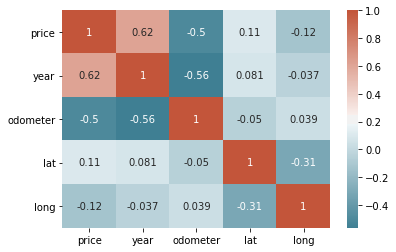

In [20]:
# Fazendo o plot da correção acima
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

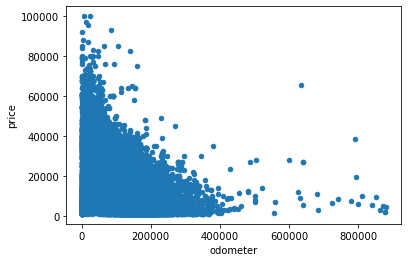

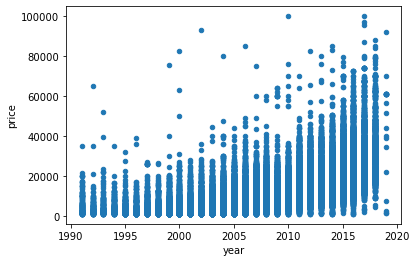

In [21]:
# Apresentando um scatteplot
df_cleaned.plot(kind='scatter', x='odometer', y='price') # É possível verificar que quanto menor o valor de odometer, maior será o valor.
df_cleaned.plot(kind='scatter', x='year', y='price') # É possível verificar que quanto mais velhor for o carro, menor será o valor dele.

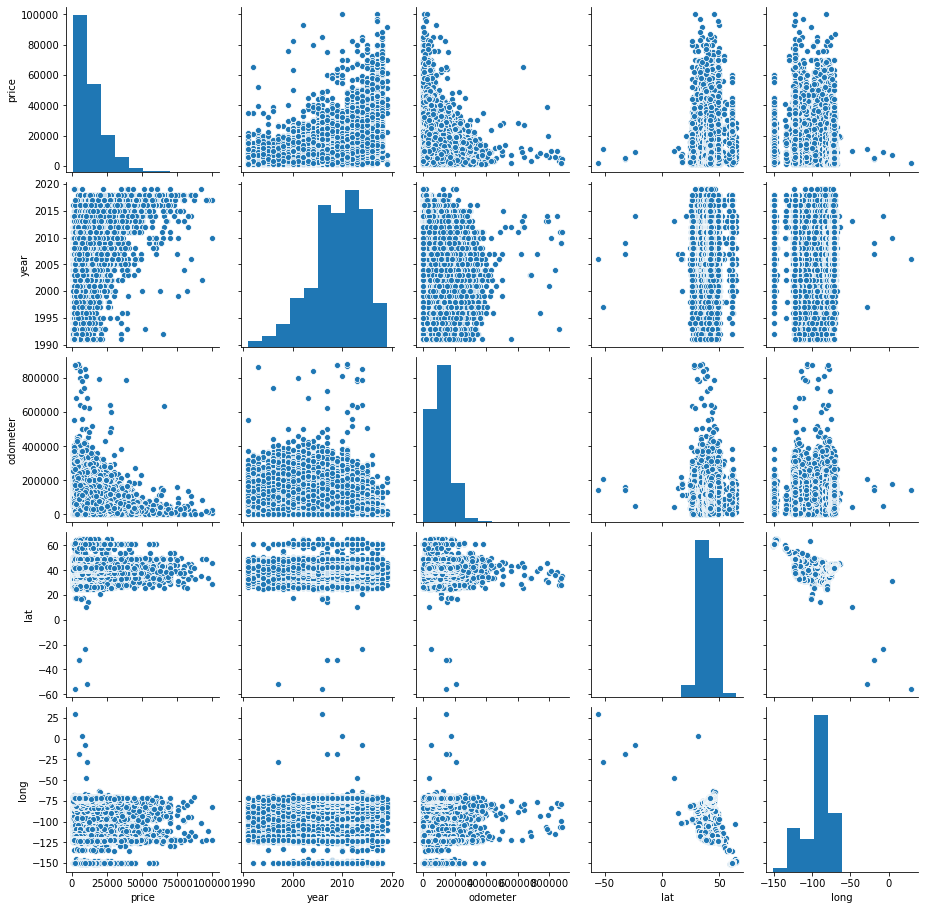

In [22]:
# Outro maneira de criar diversos scatterplot entre todas as variáveis que temos no nosso dataset (dataframe) é utilizando o pacote seaborn com a lib pairplot
sns.pairplot(df_cleaned)

#### Distribuição

##### Histogramas

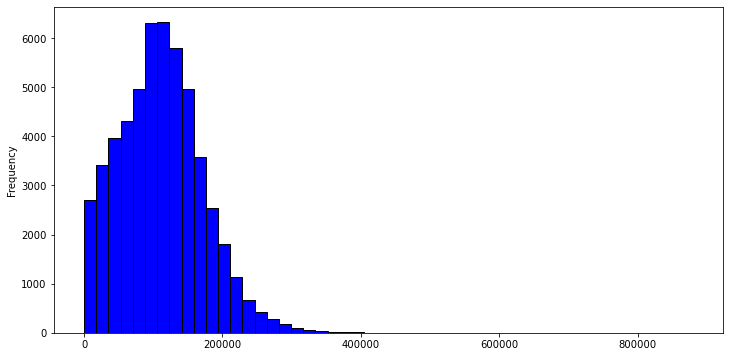

In [23]:
# Se eu quiser analisar uma única variável por si só, devo utilizar histograma. Assim, consigo visualizar a distribuição da variável.
df_cleaned['odometer'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='blue',edgecolor='black')

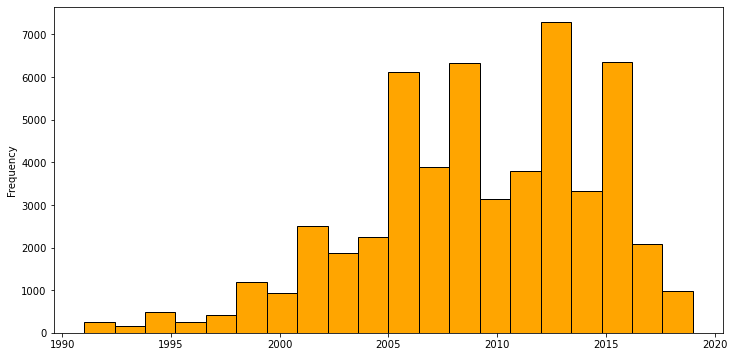

In [24]:
# 
df_cleaned['year'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='orange',edgecolor='black')

##### Boxplot

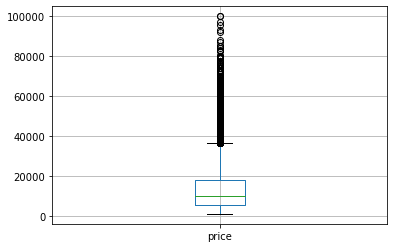

In [25]:
df_cleaned.boxplot('price')